In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
arr = np.random.randn(100)

In [9]:
arr.shape

(100,)

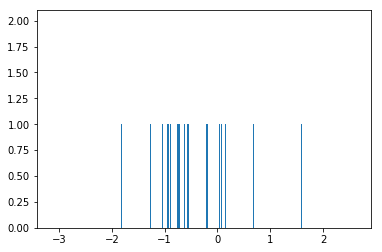

In [20]:
plt.hist( arr, bins = 1000)
plt.show()

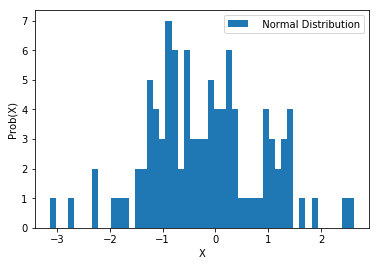

In [42]:
plt.hist(arr, bins =50, label = "  Normal Distribution")
plt.xlabel("X")
plt.ylabel("Prob(X)")
plt.legend()
plt.show()


In [32]:
marks = np.random.randn(100*10) + 60
marks

array([60.75458846, 60.10249857, 61.28547269, 60.0704531 , 60.38171427,
       59.44193754, 62.25048612, 60.22222726, 60.0769789 , 60.47028943,
       60.09911448, 60.64742454, 59.05170068, 60.01965003, 62.12272959,
       59.56716868, 59.72707626, 60.55032957, 61.33325676, 60.61507275,
       60.0342199 , 60.91412111, 60.08026207, 61.11400716, 59.86796744,
       59.35516128, 59.67872597, 59.31046895, 60.81928814, 60.55035814,
       59.06910384, 58.95750018, 60.89407049, 59.37025737, 62.22262558,
       61.05123782, 59.17634746, 60.40745016, 59.15502261, 60.98612895,
       61.31056184, 59.76854712, 58.83574819, 59.86698579, 60.06038261,
       60.58028515, 59.74088905, 59.54918586, 58.67087052, 62.08672327,
       59.49370951, 60.28045721, 59.10308104, 59.29046893, 59.40143503,
       61.65565139, 59.8746638 , 59.94584279, 58.98311033, 61.25907625,
       60.04737348, 59.75075354, 58.81980876, 59.93218002, 59.95655317,
       59.49883894, 61.57755232, 60.51211274, 56.60501417, 61.90

In [33]:
np.mean(marks)

60.00783441843179

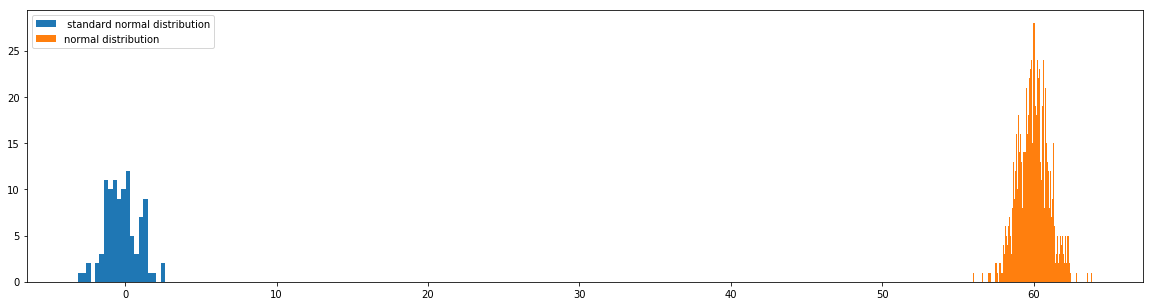

In [51]:
plt.figure(figsize = (20,5))
plt.hist(arr, bins =20, label = " standard normal distribution")
plt.hist(marks, bins = 150, label = "normal distribution")
plt.legend()
plt.show()

# Multivariate Normal Distribution

In [75]:
applesData = np.random.multivariate_normal(mean = [5,7], cov = [[1, 0.5],[0.5, 1.2]], size = 500)
applesData.shape
orangesData = np.random.multivariate_normal(mean = [10,12], cov = [[2, -0.5], [-0.5 ,1]], size = 600)

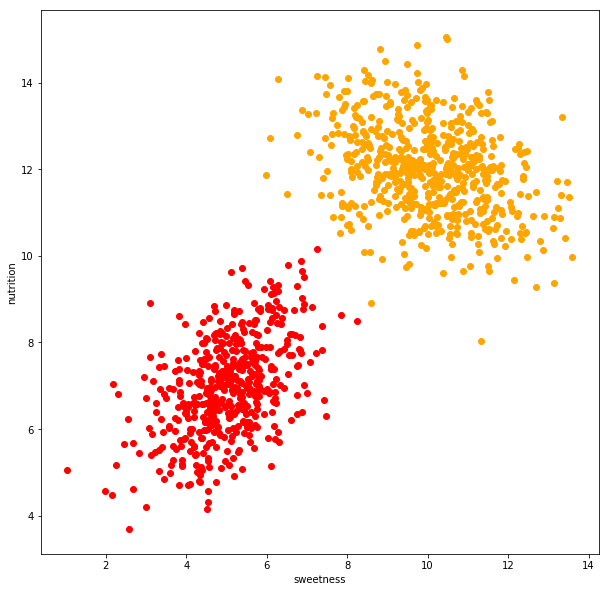

In [85]:
plt.figure(figsize = (10,10))
plt.scatter(applesData[:,0], applesData[:,1],color ='red', label = 'apples')
plt.scatter(orangesData[:,0], orangesData[:,1], color = 'orange', label = 'orange')
plt.xlabel("sweetness")
plt.ylabel("nutrition")
plt.show()
#plt.legend()
plt.show()

# K-nearest neighbours

# Data Prediction

In [91]:
totalFruits =  applesData.shape[0] + orangesData.shape[0]
totalFruits

1100

In [93]:
X = np.zeros((totalFruits, 3))
X.shape

(1100, 3)

In [172]:
X[:500,:-1] = applesData
X[500:, :-1] = orangesData
X[500:, -1] = 1

In [173]:
X

array([[ 5.16898902,  7.46119034,  0.        ],
       [ 4.82427059,  7.04494733,  0.        ],
       [ 5.19543575,  8.65060848,  0.        ],
       ...,
       [12.37681015, 11.78287895,  1.        ],
       [ 7.36005016, 11.39923627,  1.        ],
       [11.17552963, 10.74068859,  1.        ]])

In [174]:
xValues = X[:, :-1]
yValues = X[:, -1]
print(xValues.shape)
print(yValues.shape)
testFruit = np.array([10,12])

(1100, 2)
(1100,)


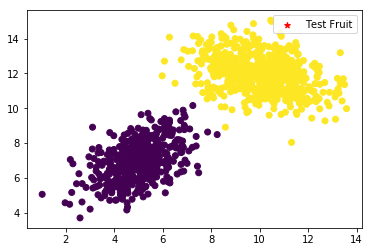

In [175]:
plt.scatter(testFruit[0], testFruit[1], color = 'red', marker = "*", label = "Test Fruit")
plt.scatter(xValues[:,0], xValues[:,1],c = yValues)
plt.legend()
plt.show()

In [176]:
def distance(p1, p2):
    return np.sum((p2-p1)**2)**0.5
#p1 = np.array([1,2])
#p2 = np.array([3,4])


In [177]:
def knn(X, Y, test, k=5):
    m = X.shape[0]
    d = []
    for i in range(m):
        dist = distance(test,X[i])
        d.append((dist,Y[i]))
    d = np.array(sorted(d))[:,1]
    d = d[:5]        #  sorted by first attribute i.e distance in this case  
    t = np.unique(d, return_counts = True)
    idx = np.argmax(t[1])
    pred = int(t[0][idx])
    if pred ==0:
            return "Apple"
    else:
            return "Orange"

In [178]:
knn(xValues, yValues, testFruit) #Change values for testFruit and try it.

'Orange'